# Logistic Regression Introduction

####While we used linear regression to deal with continuous data, that helped in predicting a future value on the basis of past data, logistic regression is different. Logsitic regression is used when the dependent variable is dichotomous (binary). For example: positive-negative, 0-1, pass-fail, benign-malignant, etc. It is assumed that the data for such dichotomous nature would be independent and that there's no correlation of data between two classes.


Many will think, why not linear regression? That's because linear data plotted on graph may look something like this:


<figure>
<center>
<img src='https://drive.google.com/uc?id=192bLivyYTXRLQaJsG8h-8jphieelQ-HX'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data</b></figcaption></center>
</figure>

But what if we are faced with data having outlier points? 

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Bk_tgAS1gMjEKqh6CVo6iZ3vNYzLf6Hx'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data with outliers</b></figcaption></center>
</figure>

It is clearly visible that the line shifts just because of one outlier. This increases confusion of the model. 

Hence, Logistic regression is used.

In logistic regression, we use logistic functions that are used to plot probabilistic models. 

Sigmoid function is a logistic function that's used in logistic regression. This is how it looks: 


<figure>
<center>
<img src='https://drive.google.com/uc?id=1ro0WaW1kszK3InLQNVoKAoFD9K370REO'/>
  </center>
  <center><figcaption><b>Sigmoid function</b></figcaption></center>
</figure>

### Let's plot this graph using Python.

In [1]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')
x = np.arange(-10., 10., 0.2)

####Math Module

In [2]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

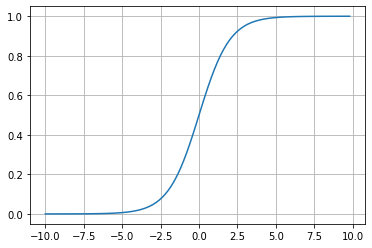

In [3]:
sig = sigmoid(x)
plt.plot(x,sig)
plt.grid(True)
plt.show()

####Numpy Module

In [4]:
def numpy_sigmoid(x):
  a = 1/(1+np.exp(-x))
  return a

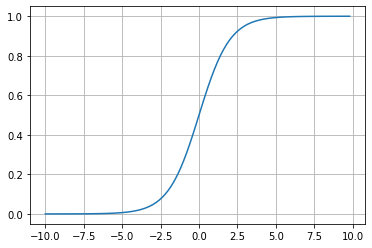

In [5]:
sig = numpy_sigmoid(x)
plt.plot(x, sig)
plt.grid(True)
plt.show()

###Other Activation functions

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6#:~:text=The%20tanh%20function%20is%20mainly,used%20in%20feed-forward%20nets.

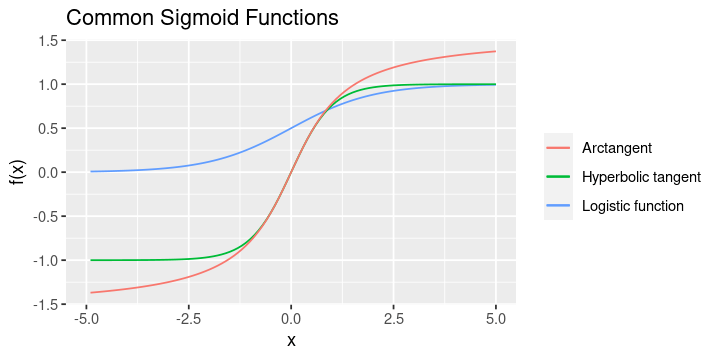

#Getting the Data

As an example, we will start working on the famous Titanic Dataset hosted on Kaggle. This example will also help us understand some data pre processing and how to draw inference and make next steps.

Download From : 
https://www.kaggle.com/c/titanic/data


In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Change these accordingly

test_df = pd.read_csv("/content/drive/MyDrive/2019-20 Content/ML-DL101 2019/ML-DL101 Datasets/test_titanic.csv")
train_df = pd.read_csv("/content/drive/MyDrive/2019-20 Content/ML-DL101 2019/ML-DL101 Datasets/train_titanic.csv")

###Data Pre-Processing

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The head of the data gives us an indication of various parameters that need to be converted into numeric form for prediction. 

In [12]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% missing'])
missing_data.head(5)

,Total,% missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


From above data, we can make following inferences:

1. Around 77% of cabin data is missing. This % is huge. So, we can't afford to drop data row-wise. It's better to delete this column entirely since majority values are missing anyways.

2. Embarked value can be easily filled.

3. With some common sense, we can eliminate variables like PassengerId, Name and Ticket as we don't expect them to have much corelation with survival chance.

In [13]:
train_df = train_df.drop(['PassengerId','Cabin'], axis=1)
train_df = train_df.drop(['Ticket','Name'], axis=1)

test_df = test_df.drop(['Ticket','Name'], axis=1)

Relation with Gender

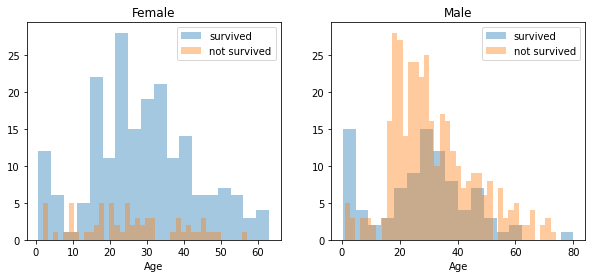

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Relation with Class

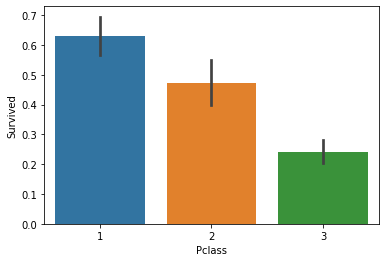

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Alone or Not

In [16]:
#Combining SibSp and Parch to show if someone is alone or not
data = [train_df, test_df]
for dataset in data:
    #SibSp = Siblings / Spouses aboard the Titanic
    #Parch = Parents / Children aboard the Titanic
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

####Filling in the Missing Age

In [17]:
data = [train_df, test_df]
print("Number of NULL values BEFORE:\t",train_df["Age"].isnull().sum())

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

print("Number of NULL values AFTER:\t",train_df["Age"].isnull().sum())

Number of NULL values BEFORE:	 177
Number of NULL values AFTER:	 0


####Filling in Embarked Values

In [18]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
#Giving Missing Embarked Values as 'S' as it is the most likely value

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    int64  
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   relatives  891 non-null    int64  
 9   not_alone  891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


####Assigning Integral Values

Gender

In [21]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Port

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Age

In [23]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

4    167
6    158
5    147
3    143
2    115
1     93
0     68
Name: Age, dtype: int64

In [24]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,2,1,0,7.2500,0,1,0
1,1,1,1,5,1,0,71.2833,1,1,0
2,1,3,1,3,0,0,7.9250,0,0,1
3,1,1,1,5,1,0,53.1000,0,1,0
4,0,3,0,5,0,0,8.0500,0,0,1
5,0,3,0,2,0,0,8.4583,2,0,1
6,0,1,0,6,0,0,51.8625,0,0,1
7,0,3,0,0,3,1,21.0750,0,4,0
8,1,3,1,3,0,2,11.1333,0,2,0
9,1,2,1,1,1,0,30.0708,1,1,0


In [25]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone
0,892,3,0,2,0,0,7.8292,NaN,2,0,1
1,893,3,1,5,1,0,7.0000,NaN,0,1,0
2,894,2,0,3,0,0,9.6875,NaN,2,0,1
3,895,3,0,5,0,0,8.6625,NaN,0,0,1
4,896,3,1,5,1,1,12.2875,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,5,0,0,8.0500,NaN,0,0,1
414,1306,1,1,6,0,0,108.9000,C105,1,0,1
415,1307,3,0,3,0,0,7.2500,NaN,0,0,1
416,1308,3,0,5,0,0,8.0500,NaN,0,0,1


##Training and Testing Datasets

In [26]:
#Training Dataset
X_train = train_df.drop(["Survived","Fare"], axis=1)
Y_train = train_df["Survived"]

#Testing Dataset
# X_test  = test_df.drop(["PassengerId","Cabin","Fare"], axis=1).copy()
# Y_test = test_df["Survived"]

In [27]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,not_alone
0,3,0,2,1,0,0,1,0
1,1,1,5,1,0,1,1,0
2,3,1,3,0,0,0,0,1
3,1,1,5,1,0,0,1,0
4,3,0,5,0,0,0,0,1


In [28]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
# Creating Train and Test splits from the train dataframe
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.30)

#Training

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

#Testing

In [32]:
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Train Accuracy via logistic regression: ",acc_log)

Train Accuracy via logistic regression:  80.1


In [33]:
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
print("Test Accuracy via logistic regression: ",acc_log)

Test Accuracy via logistic regression:  79.48


In [34]:
from sklearn.model_selection import cross_val_score
#That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

scores = cross_val_score(logreg, X_train, Y_train, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.776      0.856      0.84       0.79032258 0.71774194]
Mean: 0.7960129032258065
Standard Deviation: 0.04917836296558706


##Confusion Matrix

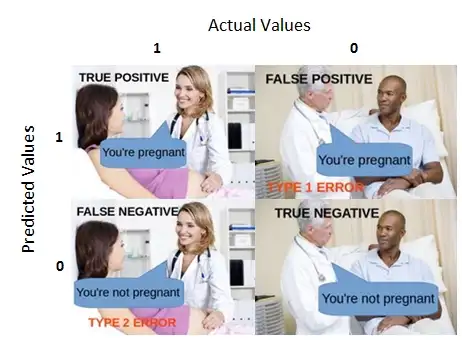

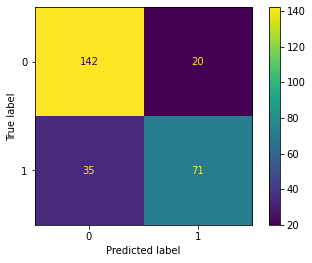

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_test, Y_test)  
plt.show()